**Сердюк, 474б**

#Использование нейронной сети для распознавания цифр в Keras


Keras — открытая нейросетевая библиотека, написанная на языке Python. Она представляет собой надстройку над фреймворками TensorFlow + Theano и нацелена на оперативную работу с сетями глубокого обучения.

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [2]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Список с названиями классов

In [26]:
classes = ['0','1','2','3','4','5','6','7','8','9']

**Просматриваем примеры изображений**

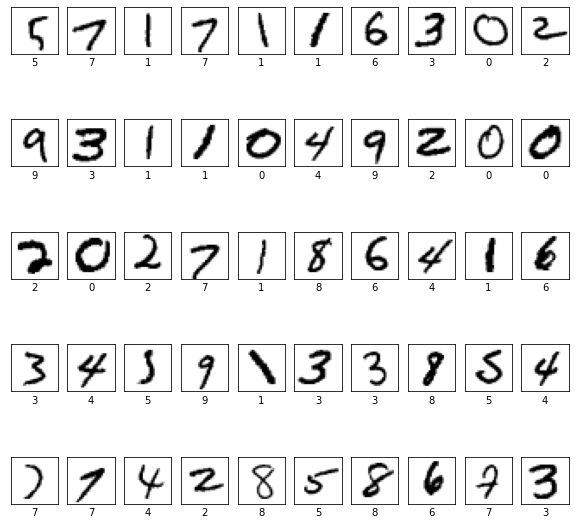

In [4]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

**Нормализация данных**

In [6]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255 
x_test = x_test / 255 

**Преобразуем метки в формат one hot encoding**

In [7]:
y_train = utils.to_categorical(y_train, 10)

In [8]:
y_test = utils.to_categorical(y_test, 10)

**Правильный ответ в формате one hot encoding**

In [9]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [10]:
# Модель отредактирована под вариант из курсовой работы
# Создаем последовательную модель
model = Sequential()
# Входные полносвязные слоя, 512 нейронов, 784 входа в каждый нейрон
model.add(Dense(512, input_dim=784, activation="relu"))
model.add(Dense(512, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [11]:
# 'categorical_crossentropy' - функция штрафа, кроссэнтропия, которую следует использовать для задач классификации, как у нас, 
#metrics=['accuracy'] значит, что мы будем вычислять в модели не только функцию штрафа, но и точность работы, то есть, число правильно классифицированных примеров.
#optimizer="SGD" Стохастический градиентный спуск (англ. Stochastic gradient descent, SGD)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) 

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

Это самая ресурсоемкая операция. Мы выполняем обучение "пачками" (mini-batch) по batch_size=200 примеров. При этом, осуществляет epochs=100 проходов по всем входным примерам.

Другие варианты режима обучения:

1) по одному примеру - медленная сходимость, и алгоритм "не видит" хороших минимумов,

2) по всем примерам сразу - трудоемко, часто сходимость к локальному минимуму и склонность к переобучению.

А обработка mini-batch - промежуточный вариант, который называется градиентным стохастическим спуском

In [12]:
history = model.fit(x_train, y_train, 
                    batch_size=128, 
                    epochs=25,
                    validation_split=0.3, # Доля валидационной выборки для контроля переобучения
                    verbose=2) #verbose=0 ничего не покажет, verbose=1 покажет анимированный индикатор выполнения (progress_bar), verbose=2 будет просто указать номер эпохи

Epoch 1/25
329/329 - 2s - loss: 0.2615 - accuracy: 0.9227 - val_loss: 0.1302 - val_accuracy: 0.9604
Epoch 2/25
329/329 - 1s - loss: 0.0924 - accuracy: 0.9710 - val_loss: 0.1033 - val_accuracy: 0.9701
Epoch 3/25
329/329 - 1s - loss: 0.0588 - accuracy: 0.9816 - val_loss: 0.1014 - val_accuracy: 0.9698
Epoch 4/25
329/329 - 1s - loss: 0.0378 - accuracy: 0.9877 - val_loss: 0.1077 - val_accuracy: 0.9686
Epoch 5/25
329/329 - 1s - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.1125 - val_accuracy: 0.9701
Epoch 6/25
329/329 - 1s - loss: 0.0178 - accuracy: 0.9945 - val_loss: 0.0983 - val_accuracy: 0.9751
Epoch 7/25
329/329 - 1s - loss: 0.0196 - accuracy: 0.9938 - val_loss: 0.1476 - val_accuracy: 0.9644
Epoch 8/25
329/329 - 1s - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.1256 - val_accuracy: 0.9715
Epoch 9/25
329/329 - 1s - loss: 0.0130 - accuracy: 0.9958 - val_loss: 0.1172 - val_accuracy: 0.9748
Epoch 10/25
329/329 - 1s - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.1014 - val_accuracy: 0.9775

## Оценка качества обучения

**Проверка качества работы на наборе данных для тестирования**

In [13]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.1096 - accuracy: 0.9798


In [14]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 97.98


## Используем сеть для распознавания цифр

0.jpg


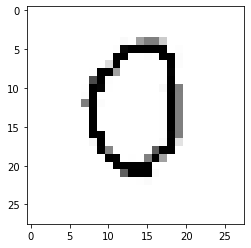

[[6.6842294e-01 7.0461795e-08 2.5662028e-03 1.2414824e-08 4.7358542e-04
  1.1736959e-08 1.2285692e-04 3.5498230e-04 6.3199841e-05 3.2799613e-01]]
Номер класса: 0
Название класса: 0
1.jpg


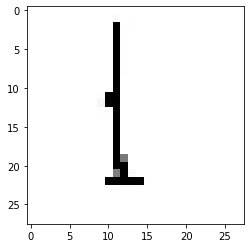

[[3.0522072e-04 1.6301514e-07 7.5456984e-07 4.1606435e-10 1.8141783e-08
  4.8900675e-03 9.9169803e-01 4.7378354e-08 3.1058036e-03 1.8576884e-09]]
Номер класса: 6
Название класса: 6
2.jpg


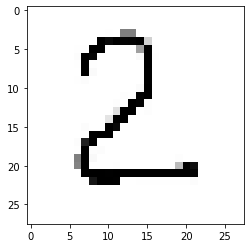

[[3.0466438e-11 3.7026066e-06 9.9843913e-01 5.8385631e-04 1.6615226e-15
  1.1705918e-10 4.4004519e-10 4.9821565e-09 9.7333064e-04 1.8931656e-15]]
Номер класса: 2
Название класса: 2
3.jpg


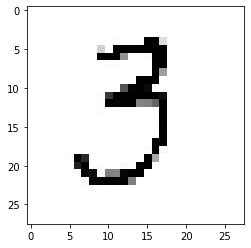

[[1.2128017e-13 1.0453370e-09 2.0982623e-12 1.0000000e+00 2.2090743e-12
  3.3533640e-09 2.0637551e-19 5.7005876e-13 6.6856506e-11 2.1801867e-09]]
Номер класса: 3
Название класса: 3
4.jpg


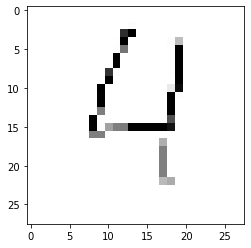

[[6.5791064e-06 2.0676841e-04 7.5234100e-05 2.9294915e-05 9.9550915e-01
  3.8701737e-06 3.0528377e-03 1.4767091e-05 1.0895140e-03 1.1901957e-05]]
Номер класса: 4
Название класса: 4
5.jpg


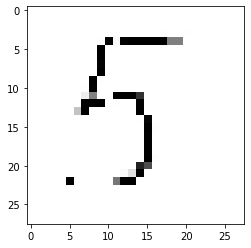

[[5.2141274e-09 3.9592877e-04 2.2125123e-06 2.0290159e-05 1.0778483e-06
  9.8793834e-01 1.9294592e-05 2.8457747e-05 1.1594169e-02 3.6594523e-07]]
Номер класса: 5
Название класса: 5
6.jpg


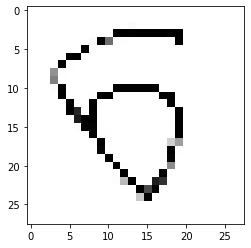

[[1.8035185e-01 1.5746302e-05 5.0835855e-08 6.3870884e-03 1.6523634e-05
  7.1217662e-01 9.3041947e-03 9.1747351e-02 3.5946013e-07 2.6570424e-07]]
Номер класса: 5
Название класса: 5
7.jpg


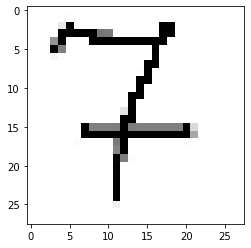

[[2.9138286e-13 5.2275122e-06 9.9997830e-01 6.6039547e-06 2.5562146e-11
  1.2488639e-11 3.1093739e-06 5.3647086e-06 1.3815948e-06 2.3572785e-21]]
Номер класса: 2
Название класса: 2
8.jpg


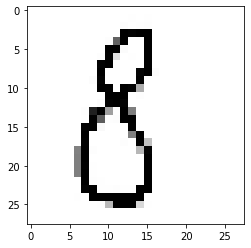

[[1.3607872e-11 2.2907720e-09 1.3545963e-10 9.6628886e-01 1.6018935e-13
  3.3695124e-02 9.6582198e-10 3.2829235e-14 1.6010237e-05 5.0836297e-12]]
Номер класса: 3
Название класса: 3
9.jpg


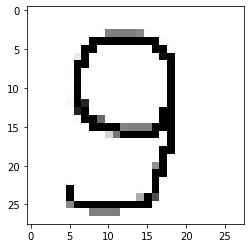

[[4.5479252e-11 1.7897997e-05 2.2311421e-04 9.9972504e-01 1.0669889e-10
  3.0064944e-05 3.1506107e-11 3.3741296e-06 4.6932993e-07 4.5252915e-10]]
Номер класса: 3
Название класса: 3
01.jpg


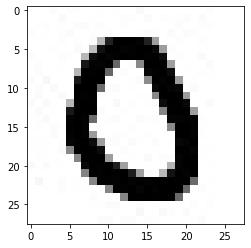

[[1.0000000e+00 8.9809739e-19 5.9499443e-16 1.6216168e-18 2.2787934e-16
  9.1109754e-16 2.0468936e-16 2.3012890e-15 7.5354518e-23 2.3905442e-15]]
Номер класса: 0
Название класса: 0
11.jpg


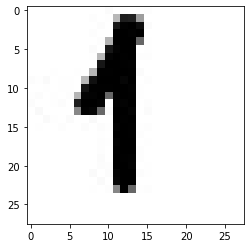

[[6.3091364e-14 3.9381599e-11 4.3288826e-13 6.8479709e-17 2.2251448e-17
  4.9281751e-10 7.1063619e-07 7.4994550e-16 9.9999928e-01 5.7940373e-19]]
Номер класса: 8
Название класса: 8
21.jpg


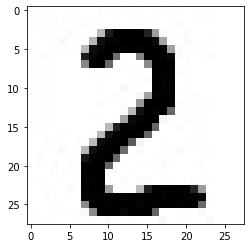

[[1.3780807e-27 3.6398395e-21 1.0000000e+00 9.2319561e-16 0.0000000e+00
  7.5724259e-37 0.0000000e+00 1.4011435e-21 1.5236636e-19 6.9286705e-32]]
Номер класса: 2
Название класса: 2
31.jpg


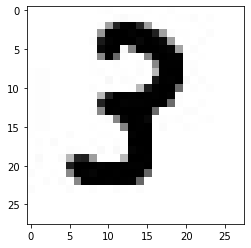

[[7.4983998e-24 1.4173490e-13 1.9817013e-12 1.0000000e+00 1.4932989e-26
  3.9767005e-20 9.4148981e-32 2.9510115e-18 1.2262445e-12 3.3165372e-15]]
Номер класса: 3
Название класса: 3
41.jpg


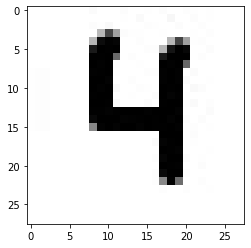

[[2.6975854e-19 9.7075820e-15 1.8253761e-18 2.1884226e-21 1.0000000e+00
  7.0324063e-19 1.2531695e-18 5.7553188e-18 7.3312637e-18 2.2448165e-16]]
Номер класса: 4
Название класса: 4
51.jpg


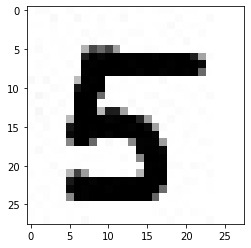

[[1.5277803e-24 2.8213528e-22 7.3264730e-28 7.2778206e-10 6.3066879e-36
  1.0000000e+00 1.1081135e-19 5.9286082e-29 2.7568985e-16 1.4948758e-21]]
Номер класса: 5
Название класса: 5
61.jpg


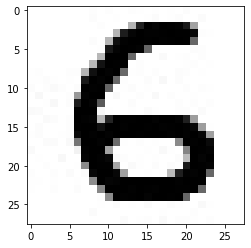

[[1.0967688e-12 6.3963467e-13 3.8836505e-14 1.4873235e-15 6.1628407e-20
  1.4645241e-06 9.9999785e-01 1.6437219e-19 7.6922959e-07 5.3273761e-19]]
Номер класса: 6
Название класса: 6
71.jpg


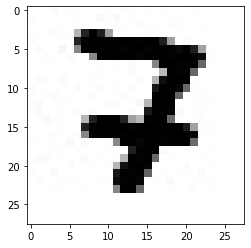

[[2.7213048e-16 2.6989284e-08 8.0578023e-01 1.4325158e-02 1.1435813e-15
  2.2973128e-14 1.9287311e-15 1.7989455e-01 1.0957373e-10 1.4122145e-16]]
Номер класса: 2
Название класса: 2
81.jpg


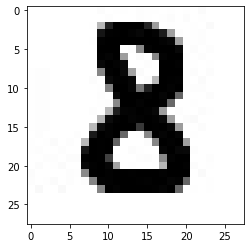

[[5.2595938e-13 2.4286788e-08 1.9541347e-05 4.5788071e-05 1.9959480e-16
  1.3859542e-15 1.6611319e-15 1.0243176e-11 9.9993467e-01 6.5324114e-17]]
Номер класса: 8
Название класса: 8
91.jpg


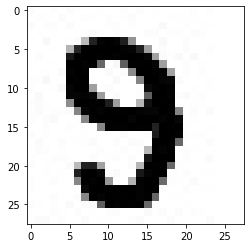

[[2.6142481e-13 2.8996347e-11 3.0066420e-12 9.9627030e-01 5.2666810e-10
  7.4815915e-07 2.5525538e-21 5.5923077e-14 2.0091331e-09 3.7290154e-03]]
Номер класса: 3
Название класса: 3
02.jpg


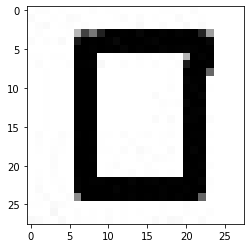

[[1.0000000e+00 2.0173777e-13 8.2421726e-12 9.8040811e-15 1.2840537e-13
  1.7654350e-12 2.2878356e-15 1.6563040e-16 2.5455688e-20 1.1555855e-16]]
Номер класса: 0
Название класса: 0
12.jpg


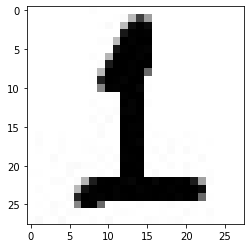

[[4.0675630e-10 1.6610757e-01 1.6646802e-02 8.1715566e-01 4.4966000e-20
  1.3353705e-06 3.5826888e-14 4.0475779e-11 8.8573928e-05 6.4479888e-13]]
Номер класса: 3
Название класса: 3
22.jpg


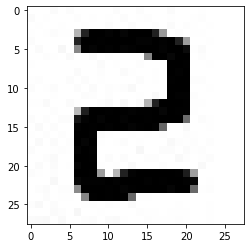

[[3.7478350e-22 2.2163134e-14 9.9836832e-01 1.6316622e-03 2.1218988e-30
  2.5290459e-20 2.9384733e-26 3.6884450e-17 2.9365027e-10 5.0805813e-25]]
Номер класса: 2
Название класса: 2
32.jpg


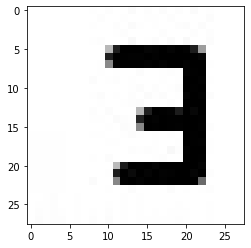

[[3.7914322e-10 1.3249247e-05 3.4987769e-07 9.9994326e-01 2.3393982e-12
  2.2434113e-05 3.6216066e-14 3.1885346e-08 1.7016538e-09 2.0716547e-05]]
Номер класса: 3
Название класса: 3
42.jpg


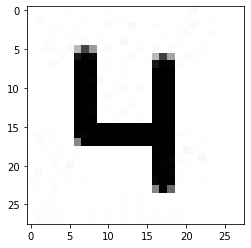

[[3.5633301e-21 1.2344230e-19 2.3067565e-22 1.1763014e-25 1.0000000e+00
  7.9731674e-27 3.3266046e-26 2.0210611e-19 8.6437662e-28 3.2407610e-22]]
Номер класса: 4
Название класса: 4
52.jpg


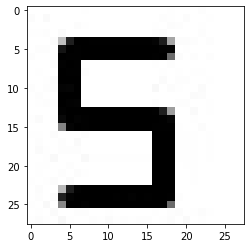

[[2.2739539e-35 4.2724626e-17 4.5579239e-27 9.9997807e-01 8.1623571e-32
  2.1920647e-05 3.0268094e-33 1.3384729e-27 6.5944771e-28 1.6623712e-29]]
Номер класса: 3
Название класса: 3
62.jpg


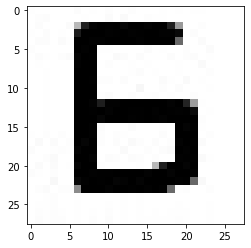

[[1.2321365e-16 2.4526245e-10 3.9118532e-13 2.7362336e-08 7.3439914e-17
  5.0641533e-02 5.6762117e-01 1.1865252e-14 3.8173720e-01 2.0900711e-19]]
Номер класса: 6
Название класса: 6
72.jpg


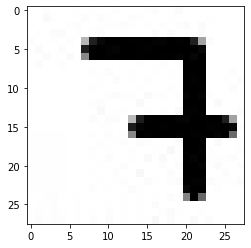

[[1.5121519e-21 2.6066624e-09 9.9935621e-01 6.4318487e-04 4.0113312e-14
  6.1060985e-07 5.5869083e-21 2.0417053e-12 8.6824797e-11 2.8874011e-15]]
Номер класса: 2
Название класса: 2
82.jpg


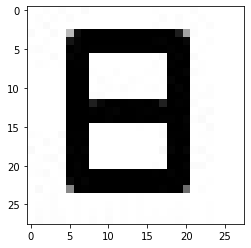

[[5.14200194e-09 1.16500985e-02 8.08349073e-01 1.79812327e-01
  1.51865097e-04 8.39251970e-06 2.14091589e-08 9.14445337e-08
  2.81464672e-05 1.64465614e-08]]
Номер класса: 2
Название класса: 2
92.jpg


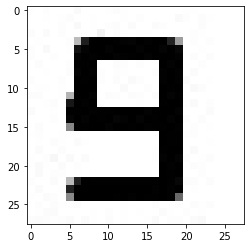

[[1.1643980e-12 1.3825856e-08 4.7935234e-09 9.7169882e-01 2.9403109e-09
  2.8301075e-02 7.5973043e-16 1.3694726e-13 2.4614353e-09 1.2296906e-07]]
Номер класса: 3
Название класса: 3


In [15]:
img_names = ['0.jpg','1.jpg','2.jpg','3.jpg','4.jpg','5.jpg','6.jpg','7.jpg','8.jpg','9.jpg',
             '01.jpg','11.jpg','21.jpg','31.jpg','41.jpg','51.jpg','61.jpg','71.jpg','81.jpg','91.jpg',
             '02.jpg','12.jpg','22.jpg','32.jpg','42.jpg','52.jpg','62.jpg','72.jpg','82.jpg','92.jpg']
for n in img_names:
  img = image.load_img(n, target_size=(28, 28), color_mode = "grayscale")
  print(n)
  plt.imshow(img.convert('RGBA'))
  plt.show()
  # Преобразуем картинку в массив
  x = image.img_to_array(img)
  # Меняем форму массива в плоский вектор
  x = x.reshape(1, 784)
  # Инвертируем изображение
  x = 255 - x
  # Нормализуем изображение
  x /= 255
  prediction = model.predict(x)
  print(prediction)
  prediction = np.argmax(prediction)
  print("Номер класса:", prediction)
  print("Название класса:", classes[prediction])

# Вторая модель

За основу взята [SudokuNet](https://github.com/egorserdyuk/Sudoku-solution)

In [16]:
INIT_LR = 1e-3
EPOCHS = 30
BS = 128
classes = 10
inputShape = (28, 28, 1)

In [17]:
class SudokuNet:
    @staticmethod
    def build_model(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)

        model.add(Conv2D(32, (5, 5), padding='same', input_shape=inputShape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(32, (5, 5), padding='same', input_shape=inputShape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())
        model.add(Dense(64))
        model.add(Activation('relu'))
        model.add(Dropout(0.25))

        model.add(Dense(64))
        model.add(Activation('relu'))
        model.add(Dropout(0.3))

        model.add(Dense(classes))
        model.add(Activation('softmax'))

        return model

In [18]:
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()

trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
testData = testData.reshape((testData.shape[0], 28, 28, 1))

trainData = trainData.astype('float32') / 255.0
testData = testData.astype('float32') / 255.0

bin = LabelBinarizer()
trainLabels = bin.fit_transform(trainLabels)
testLabels = bin.transform(testLabels)

In [19]:
optimizer = Adam(lr=INIT_LR)
model = SudokuNet.build_model(28, 28, 1, 10)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [20]:
net = model.fit(trainData, trainLabels, validation_data=(testData, testLabels), batch_size=BS, epochs=EPOCHS, verbose=2)

Epoch 1/30
469/469 - 5s - loss: 0.3928 - accuracy: 0.8775 - val_loss: 0.0651 - val_accuracy: 0.9810
Epoch 2/30
469/469 - 2s - loss: 0.1140 - accuracy: 0.9686 - val_loss: 0.0436 - val_accuracy: 0.9873
Epoch 3/30
469/469 - 2s - loss: 0.0783 - accuracy: 0.9784 - val_loss: 0.0352 - val_accuracy: 0.9889
Epoch 4/30
469/469 - 2s - loss: 0.0628 - accuracy: 0.9824 - val_loss: 0.0286 - val_accuracy: 0.9910
Epoch 5/30
469/469 - 2s - loss: 0.0526 - accuracy: 0.9852 - val_loss: 0.0305 - val_accuracy: 0.9912
Epoch 6/30
469/469 - 2s - loss: 0.0428 - accuracy: 0.9878 - val_loss: 0.0273 - val_accuracy: 0.9927
Epoch 7/30
469/469 - 2s - loss: 0.0396 - accuracy: 0.9883 - val_loss: 0.0272 - val_accuracy: 0.9920
Epoch 8/30
469/469 - 2s - loss: 0.0354 - accuracy: 0.9895 - val_loss: 0.0304 - val_accuracy: 0.9912
Epoch 9/30
469/469 - 2s - loss: 0.0306 - accuracy: 0.9908 - val_loss: 0.0254 - val_accuracy: 0.9931
Epoch 10/30
469/469 - 2s - loss: 0.0270 - accuracy: 0.9920 - val_loss: 0.0289 - val_accuracy: 0.9920

In [21]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)             

In [22]:
scores = model.evaluate(testData, testLabels, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0336 - accuracy: 0.9933


In [23]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 99.33


In [24]:
print(r"Eval the network")
pred = model.predict(testData)
print(
    classification_report(testLabels.argmax(axis=1), pred.argmax(axis=1), target_names=[str(x) for x in range(0, 10)]))

Eval the network
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



0.jpg


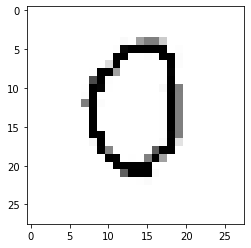

[[1.5626299e-11 1.0094617e-08 2.2875756e-06 9.9905342e-01 5.0350587e-12
  5.2723053e-06 3.5415518e-12 2.0240670e-07 6.0239847e-07 9.3819271e-04]]
Номер класса: 3
Название класса: 3
1.jpg


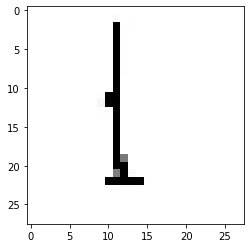

[[5.8664737e-06 2.8310385e-06 9.4611765e-05 2.1130547e-03 4.5054684e-08
  7.1642615e-02 1.9586928e-02 1.5743766e-06 9.0654653e-01 5.9000085e-06]]
Номер класса: 8
Название класса: 8
2.jpg


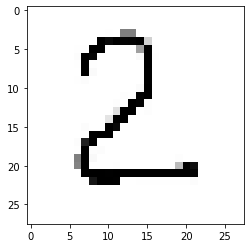

[[1.0993026e-09 3.6346887e-07 1.4685177e-05 9.8527390e-01 1.1943727e-12
  1.4266625e-02 2.2117250e-07 2.9790098e-07 4.3823975e-04 5.7059469e-06]]
Номер класса: 3
Название класса: 3
3.jpg


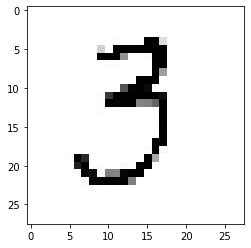

[[2.5190771e-13 1.1671257e-10 5.5861346e-06 9.9998903e-01 2.3657778e-16
  7.4739870e-07 1.1342492e-12 7.5556281e-09 4.1817152e-06 4.6213157e-07]]
Номер класса: 3
Название класса: 3
4.jpg


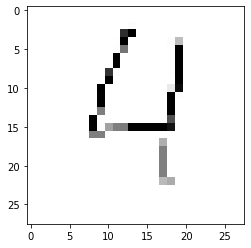

[[5.5157474e-09 8.0080946e-07 1.5624227e-03 9.9315393e-01 4.2819112e-12
  3.1811048e-03 2.6076023e-07 2.4310200e-06 2.0942588e-03 4.7017106e-06]]
Номер класса: 3
Название класса: 3
5.jpg


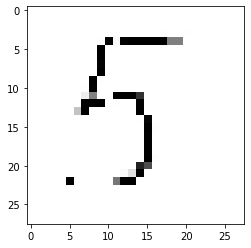

[[2.6687928e-06 2.4611877e-06 1.2477119e-02 2.9364359e-01 1.7376255e-08
  1.0991604e-02 2.8173960e-04 2.4326891e-05 6.8148625e-01 1.0901258e-03]]
Номер класса: 8
Название класса: 8
6.jpg


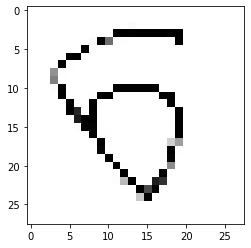

[[2.2695727e-10 1.3381538e-07 3.6937693e-06 9.9629265e-01 2.4468212e-12
  3.5787399e-03 2.3832885e-09 2.5339580e-07 3.0772182e-05 9.3752038e-05]]
Номер класса: 3
Название класса: 3
7.jpg


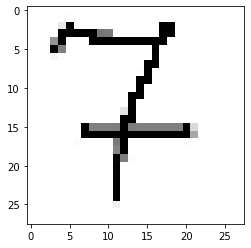

[[3.8508974e-10 1.2337500e-07 1.0374337e-03 9.7251725e-01 1.3735767e-11
  2.6217481e-02 3.9635292e-08 3.3615654e-06 2.1841544e-04 5.7702632e-06]]
Номер класса: 3
Название класса: 3
8.jpg


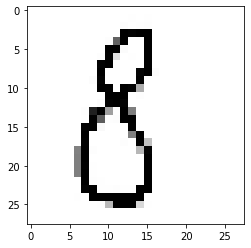

[[3.8495991e-06 5.9082265e-07 9.4635907e-04 1.7790525e-03 1.0210514e-08
  5.0062723e-03 1.1255996e-02 1.2058541e-06 9.8100364e-01 3.0666286e-06]]
Номер класса: 8
Название класса: 8
9.jpg


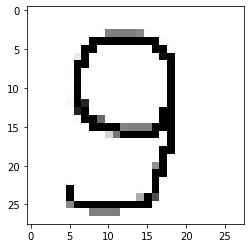

[[9.0766911e-10 1.1365316e-07 2.7069640e-05 9.9622262e-01 6.7277245e-10
  7.9377211e-04 2.8530001e-09 1.6835908e-06 3.7860980e-05 2.9168958e-03]]
Номер класса: 3
Название класса: 3
01.jpg


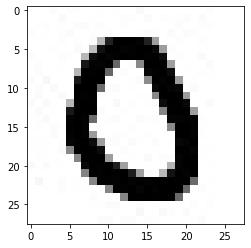

[[2.2833992e-08 1.4569502e-08 1.4365638e-04 9.9957758e-01 3.0670965e-13
  1.6441260e-05 1.0710250e-07 2.3487884e-08 2.3169920e-04 3.0507348e-05]]
Номер класса: 3
Название класса: 3
11.jpg


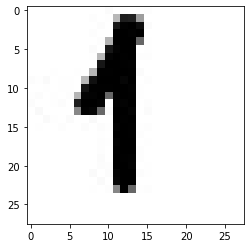

[[1.9371189e-06 1.5847263e-05 3.0810679e-07 5.5187143e-04 1.3786408e-07
  9.9828243e-01 4.1556914e-04 3.2611254e-07 7.1570370e-04 1.5994541e-05]]
Номер класса: 5
Название класса: 5
21.jpg


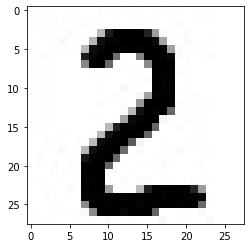

[[3.3825152e-08 1.9778192e-06 9.9999583e-01 4.7885113e-10 2.1363206e-10
  1.9519328e-13 1.7590868e-10 2.2003044e-06 8.6911078e-10 2.4151037e-11]]
Номер класса: 2
Название класса: 2
31.jpg


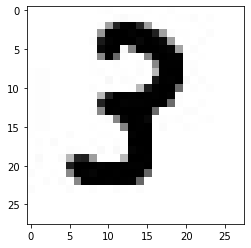

[[1.3489769e-08 4.0773357e-06 3.4736090e-06 6.7705846e-01 7.3997576e-08
  2.2800786e-02 1.9163798e-08 4.4666381e-06 2.2508717e-05 3.0010611e-01]]
Номер класса: 3
Название класса: 3
41.jpg


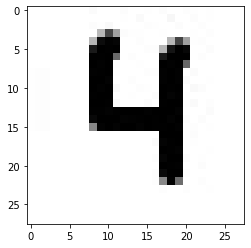

[[2.1131079e-07 8.2237898e-07 8.4957820e-01 3.1172909e-02 7.4444124e-11
  1.5860944e-05 2.5139649e-05 8.5622960e-06 1.1919568e-01 2.6141884e-06]]
Номер класса: 2
Название класса: 2
51.jpg


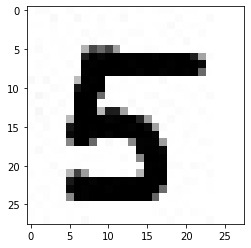

[[9.83659062e-23 4.39928530e-13 1.13812990e-15 8.96192074e-01
  1.51817622e-24 1.03807874e-01 8.33157225e-22 1.84355942e-14
  1.08734956e-16 2.31569954e-11]]
Номер класса: 3
Название класса: 3
61.jpg


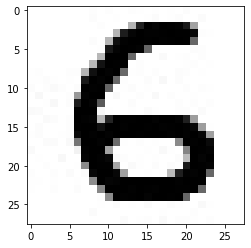

[[1.8644657e-11 7.1997226e-12 2.5325190e-15 5.2810819e-08 1.2280525e-14
  1.0000000e+00 1.1597413e-08 1.6560063e-13 2.8177075e-10 9.6401853e-10]]
Номер класса: 5
Название класса: 5
71.jpg


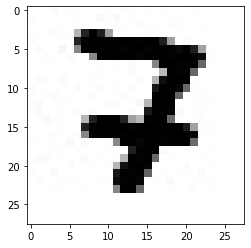

[[2.5258093e-09 4.0827840e-06 3.4799743e-02 9.6494919e-01 5.2379893e-12
  2.4863686e-05 6.4320016e-10 2.1679346e-04 4.9259843e-06 3.3285312e-07]]
Номер класса: 3
Название класса: 3
81.jpg


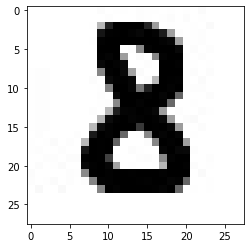

[[1.2361185e-06 1.8661696e-08 2.0810392e-06 2.9676776e-05 1.5489535e-09
  1.2788198e-02 9.7673655e-01 7.2483610e-09 1.0442216e-02 6.4727584e-10]]
Номер класса: 6
Название класса: 6
91.jpg


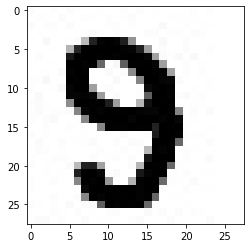

[[3.3717463e-11 6.1281810e-08 4.4840809e-02 9.5500553e-01 6.4032910e-13
  1.3471665e-04 7.4312388e-12 1.7119479e-05 7.2615433e-07 9.6135705e-07]]
Номер класса: 3
Название класса: 3
02.jpg


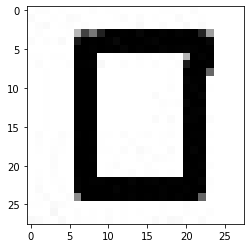

[[4.7770346e-04 1.7603887e-04 3.5378441e-01 4.6789076e-02 1.7358520e-06
  4.9211099e-03 1.1398463e-01 2.5745123e-04 4.7953361e-01 7.4260279e-05]]
Номер класса: 8
Название класса: 8
12.jpg


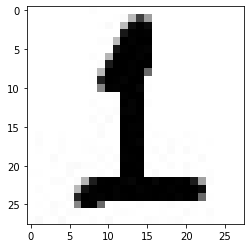

[[8.7883527e-05 5.0817416e-03 2.5267240e-03 6.8337766e-07 1.8491804e-04
  7.9862424e-05 9.9203378e-01 3.9074674e-08 4.3906657e-06 1.5370585e-10]]
Номер класса: 6
Название класса: 6
22.jpg


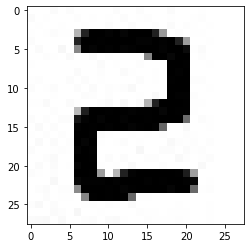

[[2.8130541e-16 1.5136084e-13 1.0000000e+00 3.9651047e-09 1.8022764e-22
  5.8587853e-19 3.9841448e-18 6.3615821e-11 1.1471840e-11 2.9056939e-17]]
Номер класса: 2
Название класса: 2
32.jpg


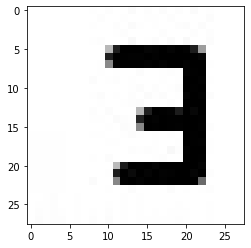

[[1.88183010e-04 1.63431367e-04 5.33833122e-03 1.13166966e-01
  2.54928159e-06 7.06118584e-01 1.73904914e-02 2.56508333e-03
  1.54862761e-01 2.03741933e-04]]
Номер класса: 5
Название класса: 5
42.jpg


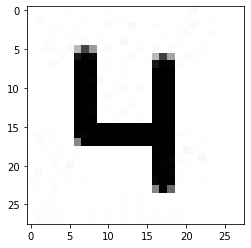

[[1.0631563e-15 5.4167278e-12 7.4373258e-10 9.9977595e-01 3.3771316e-15
  2.0362114e-04 1.5201768e-14 1.2005605e-10 2.9244516e-09 2.0547754e-05]]
Номер класса: 3
Название класса: 3
52.jpg


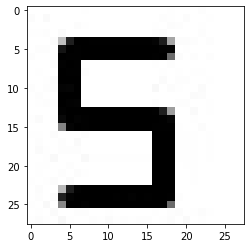

[[3.1510507e-13 5.2648232e-09 7.6314565e-03 9.9235922e-01 1.2085760e-15
  3.2392711e-06 2.0598245e-12 5.6708186e-06 4.0590544e-07 6.4595866e-08]]
Номер класса: 3
Название класса: 3
62.jpg


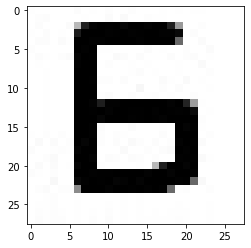

[[8.5202304e-20 4.4602075e-14 9.1532653e-19 2.5559825e-06 2.1107275e-24
  9.9999750e-01 1.9560700e-16 2.5717930e-17 7.9023679e-16 2.0948958e-14]]
Номер класса: 5
Название класса: 5
72.jpg


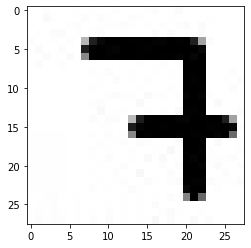

[[5.8489504e-06 3.8394592e-06 2.9177272e-03 8.9671355e-01 8.1406625e-08
  1.2553663e-02 7.9499812e-05 1.4557733e-04 8.2188003e-02 5.3921803e-03]]
Номер класса: 3
Название класса: 3
82.jpg


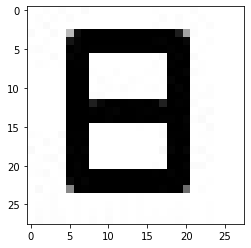

[[2.0601046e-15 4.9995736e-09 4.5584545e-09 9.9967718e-01 1.2374656e-19
  3.2287269e-04 1.5876562e-15 1.5979225e-10 7.9819623e-11 8.9802779e-09]]
Номер класса: 3
Название класса: 3
92.jpg


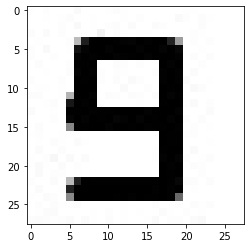

[[8.7497736e-16 2.2988425e-12 9.9590671e-01 4.0932195e-03 8.7311377e-23
  3.8653561e-15 2.8297018e-16 4.4159307e-12 9.1777652e-09 2.7754296e-13]]
Номер класса: 2
Название класса: 2


In [27]:
img_names = ['0.jpg','1.jpg','2.jpg','3.jpg','4.jpg','5.jpg','6.jpg','7.jpg','8.jpg','9.jpg',
             '01.jpg','11.jpg','21.jpg','31.jpg','41.jpg','51.jpg','61.jpg','71.jpg','81.jpg','91.jpg',
             '02.jpg','12.jpg','22.jpg','32.jpg','42.jpg','52.jpg','62.jpg','72.jpg','82.jpg','92.jpg']
for n in img_names:
  img = image.load_img(n, target_size=(28, 28), color_mode = "grayscale")
  print(n)
  plt.imshow(img.convert('RGBA'))
  plt.show()
  # Преобразуем картинку в массив
  x = image.img_to_array(img)
  # Меняем форму массива в плоский вектор
  x = np.expand_dims(x, axis=0)
  x = x/255.0
  prediction = model.predict(x)
  print(prediction)
  prediction = np.argmax(prediction)
  print("Номер класса:", prediction)
  print("Название класса:", classes[prediction])

#Итог
#Первая сеть
Из 30 картинок (3 набора цифр в разных стилях) лишь 16 цифр было угадано верно. Цифры: 0, 3 и 4 угадываются в 100% случаях. Основные проблемы с цифрами 7, 8 и 9.
#Вторая сеть (SudokuNet, которая изначально обучалась на infiMNIST)
Из 30 картинок (3 набора цифр в разных стилях) лишь 5 цифр было угадано верно, это самый худший результат, который может и внутри MNIST показывает самый высокий score, но на деле годится меньше первой сети.